### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from io import StringIO
from matplotlib.colors import ListedColormap

### Part I - Importing the Dataset

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
res = requests.get(url, headers=None, verify=False)
df = pd.read_csv(StringIO(res.text), header=None)
df.head()

c:\Users\barce\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'archive.ics.uci.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Convert the categorical data to numeric
df[4].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0, 1, 2], inplace=True)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Select the petal and sepal width features
X = df.loc[:, [3, 1]].values
y = df.loc[:, 4].values

In [5]:
# Print class labels
print('Class labels: ', np.unique(df[4]))

Class labels:  [0 1 2]


### Part II - Training the SVM

In [6]:
# Spliting the dataset to training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3, stratify=y)

print("Labels count in y_train: ", np.bincount(y_train))
print("Labels count in y_test: ", np.bincount(y_test))

Labels count in y_train:  [35 35 35]
Labels count in y_test:  [15 15 15]


In [7]:
# Feature scaling
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
# Training the SVM
svm = SVC(kernel='linear', C=1.0, random_state=3)
svm.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=3)

### Part III - Evaluate the SVM Model

In [9]:
# Misclasified samples count
y_pred = svm.predict(X_test_std)
print("Number of misclassified samples: %d" % (y_test != y_pred).sum())

Number of misclassified samples: 5


In [10]:
# Determine misclasified samples
misclassified_ndx = [i for i, (pred, actual) in enumerate(zip(y_pred, y_test)) if pred != actual]
print(f"Misclassified sample indices: {misclassified_ndx}")

Misclassified sample indices: [8, 10, 17, 40, 41]


In [11]:
# Accuracy of the SVM model
print("Accuracy (predictions): %.2f" % accuracy_score(y_test, y_pred))
print("Accuracy: %.2f" % svm.score(X_test_std, y_test))

Accuracy (predictions): 0.89
Accuracy: 0.89


### Part IV - Plotting the decision regions and the Data

In [12]:
# Plot decision regions
def plot_decision_regions(X, y, classifier, test_samples, misclass_ndx, resolution=0.01):

    # Setup marker generator and colormap
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Create a mesh grid for the colormap plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution), np.arange(y_min, y_max, resolution))

    # Predict class labels for each point in the mesh grid
    Z = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx],
                    label=cl, edgecolor='black')
    
    # Highlight test samples
    plt.scatter(test_samples[:, 0], test_samples[:, 1], c='None', edgecolor='black', alpha=1.0, linewidth=1,
                marker='o', s=100, label='test samples')
    
    # Highlight misclassified samples
    plt.scatter(X_test_std[misclass_ndx, 0], X_test_std[misclass_ndx, 1], c='None', edgecolor='red',
                alpha=1.0, linewidth=1, s=100, label='misclassified samples')

C:\Users\barce\AppData\Local\Temp\ipykernel_10160\374822478.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx],


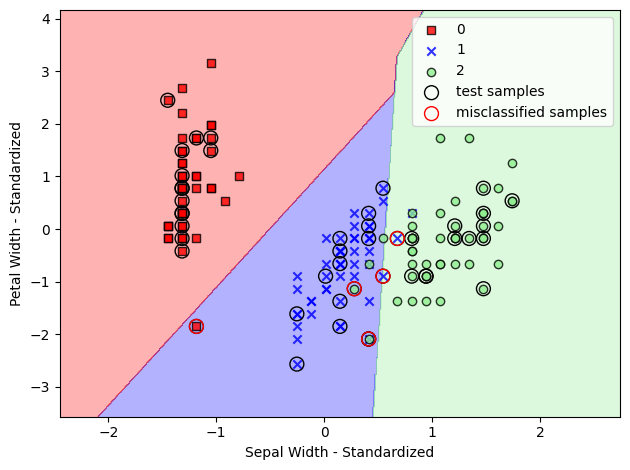

In [13]:
# Initialize variables
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, svm, X_test_std, misclassified_ndx)
plt.xlabel('Sepal Width - Standardized')
plt.ylabel('Petal Width - Standardized')
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()